In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from utils import train, val_eval, test_eval

In [14]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Ensure dataset size is divisible by batch size
dataset_size = len(trainset)
batch_size = 144
num_batches = dataset_size // batch_size
remaining_samples = dataset_size % batch_size
if remaining_samples > 0:
    trainset, _ = torch.utils.data.random_split(trainset, [num_batches * batch_size, remaining_samples])

train_size = int(0.6 * len(trainset))
val_size = int(0.2 * len(trainset))
test_size = len(trainset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(trainset, [train_size, val_size, test_size])

In [10]:
num_filters = [16, 32, 64]
kernel_sizes = [3, 5]

In [44]:
class CNN(nn.Module):
    def __init__(self, num_filters, kernel_size):
        super(CNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, num_filters, kernel_size=kernel_size, padding=kernel_size//2)
        self.conv2 = nn.Conv2d(num_filters, num_filters * 2, kernel_size=kernel_size, padding=kernel_size//2)
        
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)  
        
        # Fully connected layers
        self.fc1 = nn.Linear(num_filters * 2 * 8 * 8, 64)  # Flatten and fully connected
        self.fc2 = nn.Linear(64, 10)  # Output layer for 10 classes
        
        # Activation functions
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Convolutional layers
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        
        # Flatten and fully connected layers
        x = x.view(-1, self.fc1.in_features)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [40]:
def grid_search(num_filters, kernel_sizes):
    best_val_acc = 0
    best_hyperparams = None

    for num_filter in num_filters:
        for kernel_size in kernel_sizes:
            model = CNN(num_filter, kernel_size)
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_func = nn.CrossEntropyLoss()

            train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, drop_last=True)
            val_loader = DataLoader(val_dataset, batch_size=256, shuffle=False, drop_last=True)

            for epoch in range(2):
                train_acc, train_loss = train(model, train_loader, optimizer, loss_func, epoch)
                val_acc, val_loss = val_eval(model, val_loader, loss_func)

                if val_acc > best_val_acc:
                    best_val_acc = val_acc
                    best_hyperparams = {
                        'num_filters': num_filter,
                        'kernel_size': kernel_size,
                    }

    return best_val_acc, best_hyperparams

In [41]:
best_val_acc, best_hyperparams = grid_search(num_filters, kernel_sizes)
print(f"Best hyperparameters: {best_hyperparams}")

Train Epoch: 0: Accuracy:0.15625	Loss: 2.3005199432373047
Train Epoch: 0: Accuracy:0.1328125	Loss: 2.2857370376586914
Train Epoch: 0: Accuracy:0.125	Loss: 2.2820074558258057
Train Epoch: 0: Accuracy:0.1220703125	Loss: 2.292698621749878
Train Epoch: 0: Accuracy:0.12265625	Loss: 2.2627053260803223
Train Epoch: 0: Accuracy:0.125	Loss: 2.253801107406616
Train Epoch: 0: Accuracy:0.12890625	Loss: 2.2210967540740967
Train Epoch: 0: Accuracy:0.14794921875	Loss: 2.204379081726074
Train Epoch: 0: Accuracy:0.16536458333333334	Loss: 2.155773162841797
Train Epoch: 0: Accuracy:0.17578125	Loss: 2.133805513381958
Train Epoch: 0: Accuracy:0.1846590909090909	Loss: 2.133145570755005
Train Epoch: 0: Accuracy:0.19270833333333334	Loss: 2.1185362339019775
Train Epoch: 0: Accuracy:0.19591346153846154	Loss: 2.117593288421631
Train Epoch: 0: Accuracy:0.19866071428571427	Loss: 2.1273744106292725
Train Epoch: 0: Accuracy:0.20130208333333333	Loss: 2.042919397354126
Train Epoch: 0: Accuracy:0.204833984375	Loss: 1.9

Train Epoch: 1: Accuracy:0.46484375	Loss: 1.5311890840530396
Train Epoch: 1: Accuracy:0.4638671875	Loss: 1.4817854166030884
Train Epoch: 1: Accuracy:0.4631076388888889	Loss: 1.4537895917892456
Train Epoch: 1: Accuracy:0.46328125	Loss: 1.4472156763076782
Train Epoch: 1: Accuracy:0.4588068181818182	Loss: 1.5184954404830933
Train Epoch: 1: Accuracy:0.4580078125	Loss: 1.4771926403045654
Train Epoch: 1: Accuracy:0.45853365384615385	Loss: 1.465588092803955
Train Epoch: 1: Accuracy:0.45731026785714285	Loss: 1.5049529075622559
Train Epoch: 1: Accuracy:0.45729166666666665	Loss: 1.5261422395706177
Train Epoch: 1: Accuracy:0.458740234375	Loss: 1.4949023723602295
Train Epoch: 1: Accuracy:0.4611672794117647	Loss: 1.366150140762329
Train Epoch: 1: Accuracy:0.4596354166666667	Loss: 1.5506095886230469
Train Epoch: 1: Accuracy:0.46011513157894735	Loss: 1.6005550622940063
Train Epoch: 1: Accuracy:0.4607421875	Loss: 1.5349407196044922
Train Epoch: 1: Accuracy:0.4635416666666667	Loss: 1.3344933986663818
T

Train Epoch: 0: Accuracy:0.17728365384615385	Loss: 2.054943323135376
Train Epoch: 0: Accuracy:0.17996651785714285	Loss: 2.0351669788360596
Train Epoch: 0: Accuracy:0.18229166666666666	Loss: 2.0647060871124268
Train Epoch: 0: Accuracy:0.18701171875	Loss: 1.9783754348754883
Train Epoch: 0: Accuracy:0.19048713235294118	Loss: 2.0634984970092773
Train Epoch: 0: Accuracy:0.19596354166666666	Loss: 1.9312211275100708
Train Epoch: 0: Accuracy:0.20086348684210525	Loss: 1.9963139295578003
Train Epoch: 0: Accuracy:0.204296875	Loss: 2.035905361175537
Train Epoch: 0: Accuracy:0.20851934523809523	Loss: 1.9381309747695923
Train Epoch: 0: Accuracy:0.2118252840909091	Loss: 1.9522433280944824
Train Epoch: 0: Accuracy:0.21705163043478262	Loss: 1.9251132011413574
Train Epoch: 0: Accuracy:0.2216796875	Loss: 1.93240225315094
Train Epoch: 0: Accuracy:0.2234375	Loss: 1.9275124073028564
Train Epoch: 0: Accuracy:0.22731370192307693	Loss: 1.8978760242462158
Train Epoch: 0: Accuracy:0.23046875	Loss: 1.896650433540

Train Epoch: 1: Accuracy:0.4720394736842105	Loss: 1.377814769744873
Train Epoch: 1: Accuracy:0.4736328125	Loss: 1.4371697902679443
Train Epoch: 1: Accuracy:0.4763764880952381	Loss: 1.400172472000122
Train Epoch: 1: Accuracy:0.4733664772727273	Loss: 1.5400018692016602
Train Epoch: 1: Accuracy:0.4741847826086957	Loss: 1.4740915298461914
Train Epoch: 1: Accuracy:0.47265625	Loss: 1.495376467704773
Train Epoch: 1: Accuracy:0.47171875	Loss: 1.508932113647461
Train Epoch: 1: Accuracy:0.4710036057692308	Loss: 1.5324472188949585
Train Epoch: 1: Accuracy:0.4713541666666667	Loss: 1.5008882284164429
Train Epoch: 1: Accuracy:0.47154017857142855	Loss: 1.4566030502319336
Train Epoch: 1: Accuracy:0.4696928879310345	Loss: 1.5707727670669556
Train Epoch: 1: Accuracy:0.47044270833333335	Loss: 1.3616302013397217
Train Epoch: 1: Accuracy:0.47026209677419356	Loss: 1.4124783277511597
Train Epoch: 1: Accuracy:0.470703125	Loss: 1.4500157833099365
Train Epoch: 1: Accuracy:0.4707623106060606	Loss: 1.501029133796

Train Epoch: 0: Accuracy:0.2503125	Loss: 1.9130289554595947
Train Epoch: 0: Accuracy:0.2530048076923077	Loss: 1.8550920486450195
Train Epoch: 0: Accuracy:0.25636574074074076	Loss: 1.8304657936096191
Train Epoch: 0: Accuracy:0.25906808035714285	Loss: 1.8800216913223267
Train Epoch: 0: Accuracy:0.2626616379310345	Loss: 1.7355782985687256
Train Epoch: 0: Accuracy:0.26588541666666665	Loss: 1.8448444604873657
Train Epoch: 0: Accuracy:0.2683971774193548	Loss: 1.8146541118621826
Train Epoch: 0: Accuracy:0.27001953125	Loss: 1.8892543315887451
Train Epoch: 0: Accuracy:0.27296401515151514	Loss: 1.716246247291565
Train Epoch: 0: Accuracy:0.2760799632352941	Loss: 1.7783819437026978
Train Epoch: 0: Accuracy:0.2767857142857143	Loss: 1.8513400554656982
Train Epoch: 0: Accuracy:0.2788628472222222	Loss: 1.7543865442276
Train Epoch: 0: Accuracy:0.2805109797297297	Loss: 1.7128899097442627
Train Epoch: 0: Accuracy:0.2844366776315789	Loss: 1.7261897325515747
Train Epoch: 0: Accuracy:0.28826121794871795	Los

Train Epoch: 1: Accuracy:0.5123487903225806	Loss: 1.2898355722427368
Train Epoch: 1: Accuracy:0.512451171875	Loss: 1.4097719192504883
Train Epoch: 1: Accuracy:0.5124289772727273	Loss: 1.3275296688079834
Train Epoch: 1: Accuracy:0.5118336397058824	Loss: 1.3590750694274902
Train Epoch: 1: Accuracy:0.5126116071428571	Loss: 1.3077220916748047
Train Epoch: 1: Accuracy:0.5138888888888888	Loss: 1.2820723056793213
Train Epoch: 1: Accuracy:0.5129856418918919	Loss: 1.308773159980774
Train Epoch: 1: Accuracy:0.5122327302631579	Loss: 1.37896728515625
Train Epoch: 1: Accuracy:0.5124198717948718	Loss: 1.3321977853775024
Train Epoch: 1: Accuracy:0.5123046875	Loss: 1.3579487800598145
Train Epoch: 1: Accuracy:0.5130525914634146	Loss: 1.339938759803772
Train Epoch: 1: Accuracy:0.5131138392857143	Loss: 1.2718262672424316
Train Epoch: 1: Accuracy:0.5142623546511628	Loss: 1.2342010736465454
Train Epoch: 1: Accuracy:0.5128728693181818	Loss: 1.3790862560272217
Train Epoch: 1: Accuracy:0.5126736111111111	Loss

Train Epoch: 0: Accuracy:0.31524493243243246	Loss: 1.7507925033569336
Train Epoch: 0: Accuracy:0.31815378289473684	Loss: 1.6594239473342896
Train Epoch: 0: Accuracy:0.31881009615384615	Loss: 1.778064489364624
Train Epoch: 0: Accuracy:0.3208984375	Loss: 1.7428025007247925
Train Epoch: 0: Accuracy:0.32221798780487804	Loss: 1.7026422023773193
Train Epoch: 0: Accuracy:0.32421875	Loss: 1.7001575231552124
Train Epoch: 0: Accuracy:0.3253997093023256	Loss: 1.7578336000442505
Train Epoch: 0: Accuracy:0.3269708806818182	Loss: 1.586761713027954
Train Epoch: 0: Accuracy:0.3285590277777778	Loss: 1.6548665761947632
Train Epoch: 0: Accuracy:0.33024796195652173	Loss: 1.6461739540100098
Train Epoch: 0: Accuracy:0.3318650265957447	Loss: 1.6045538187026978
Train Epoch: 0: Accuracy:0.3339029947916667	Loss: 1.6505547761917114
Train Epoch: 0: Accuracy:0.3349011479591837	Loss: 1.7221813201904297
Train Epoch: 0: Accuracy:0.336640625	Loss: 1.6012749671936035
Train Epoch: 0: Accuracy:0.3382352941176471	Loss: 1.

Train Epoch: 1: Accuracy:0.5221354166666666	Loss: 1.3153764009475708
Train Epoch: 1: Accuracy:0.5222565406976745	Loss: 1.2583414316177368
Train Epoch: 1: Accuracy:0.5221058238636364	Loss: 1.3851135969161987
Train Epoch: 1: Accuracy:0.5224826388888889	Loss: 1.28037428855896
Train Epoch: 1: Accuracy:0.5226732336956522	Loss: 1.3110487461090088
Train Epoch: 1: Accuracy:0.5232712765957447	Loss: 1.2709617614746094
Train Epoch: 1: Accuracy:0.5227864583333334	Loss: 1.3505964279174805
Train Epoch: 1: Accuracy:0.5237563775510204	Loss: 1.2172435522079468
Train Epoch: 1: Accuracy:0.5253125	Loss: 1.2181966304779053
Train Epoch: 1: Accuracy:0.5244332107843137	Loss: 1.3369414806365967
Train Epoch: 1: Accuracy:0.5249399038461539	Loss: 1.263791561126709
Train Epoch: 1: Accuracy:0.5260908018867925	Loss: 1.2165253162384033
Train Epoch: 1: Accuracy:0.5272714120370371	Loss: 1.217429757118225
Train Epoch: 1: Accuracy:0.5276988636363636	Loss: 1.2545665502548218
Train Epoch: 1: Accuracy:0.5279715401785714	Los

Train Epoch: 0: Accuracy:0.3235677083333333	Loss: 1.7049599885940552
Train Epoch: 0: Accuracy:0.3270886479591837	Loss: 1.5897607803344727
Train Epoch: 0: Accuracy:0.33	Loss: 1.4681499004364014
Train Epoch: 0: Accuracy:0.3319546568627451	Loss: 1.5503568649291992
Train Epoch: 0: Accuracy:0.33383413461538464	Loss: 1.593217372894287
Train Epoch: 0: Accuracy:0.33571639150943394	Loss: 1.6219737529754639
Train Epoch: 0: Accuracy:0.3373119212962963	Loss: 1.6091644763946533
Train Epoch: 0: Accuracy:0.34005681818181815	Loss: 1.481776237487793
Train Epoch: 0: Accuracy:0.34193638392857145	Loss: 1.5557750463485718
Train Epoch: 0: Accuracy:0.3432702850877193	Loss: 1.614025592803955
Train Epoch: 0: Accuracy:0.3459051724137931	Loss: 1.458612084388733
Train Epoch: 0: Accuracy:0.3471927966101695	Loss: 1.5952606201171875
Train Epoch: 0: Accuracy:0.35	Loss: 1.5260820388793945
Train Epoch: 0: Accuracy:0.3515625	Loss: 1.5133734941482544
Train Epoch: 0: Accuracy:0.35376764112903225	Loss: 1.5318185091018677
T

Train Epoch: 1: Accuracy:0.5393518518518519	Loss: 1.2249197959899902
Train Epoch: 1: Accuracy:0.5404119318181818	Loss: 1.2159382104873657
Train Epoch: 1: Accuracy:0.5415736607142857	Loss: 1.1720197200775146
Train Epoch: 1: Accuracy:0.5423519736842105	Loss: 1.1303836107254028
Train Epoch: 1: Accuracy:0.5426320043103449	Loss: 1.2776474952697754
Train Epoch: 1: Accuracy:0.5425052966101694	Loss: 1.2728750705718994
Train Epoch: 1: Accuracy:0.543359375	Loss: 1.1791008710861206
Train Epoch: 1: Accuracy:0.5443775614754098	Loss: 1.225367784500122
Train Epoch: 1: Accuracy:0.544921875	Loss: 1.226162075996399
Train Epoch: 1: Accuracy:0.5452628968253969	Loss: 1.1802669763565063
Train Epoch: 1: Accuracy:0.54644775390625	Loss: 1.0853363275527954
Train Epoch: 1: Accuracy:0.5465144230769231	Loss: 1.2986314296722412
Train Epoch: 1: Accuracy:0.5469933712121212	Loss: 1.220099687576294
Train Epoch: 1: Accuracy:0.546816697761194	Loss: 1.268805742263794
Train Epoch: 1: Accuracy:0.5472771139705882	Loss: 1.127

Train Epoch: 0: Accuracy:0.3487817796610169	Loss: 1.5325241088867188
Train Epoch: 0: Accuracy:0.3509765625	Loss: 1.4782860279083252
Train Epoch: 0: Accuracy:0.35213883196721313	Loss: 1.613490104675293
Train Epoch: 0: Accuracy:0.35395665322580644	Loss: 1.5445915460586548
Train Epoch: 0: Accuracy:0.3564608134920635	Loss: 1.43917715549469
Train Epoch: 0: Accuracy:0.357666015625	Loss: 1.4870308637619019
Train Epoch: 0: Accuracy:0.359375	Loss: 1.4890782833099365
Train Epoch: 0: Accuracy:0.36085464015151514	Loss: 1.4640735387802124
Train Epoch: 0: Accuracy:0.36199860074626866	Loss: 1.5132538080215454
Train Epoch: 0: Accuracy:0.3632238051470588	Loss: 1.515617847442627
Train Epoch: 0: Accuracy:0.365036231884058	Loss: 1.4650013446807861
Train Epoch: 0: Accuracy:0.3665178571428571	Loss: 1.4146311283111572
Train Epoch: 0: Accuracy:0.36801276408450706	Loss: 1.4650441408157349
Train Epoch: 0: Accuracy:0.3694661458333333	Loss: 1.4310994148254395
Train Epoch: 0: Accuracy:0.3712542808219178	Loss: 1.42

Train Epoch: 1: Accuracy:0.5447716346153846	Loss: 1.1624863147735596
Train Epoch: 1: Accuracy:0.5440932765151515	Loss: 1.3403278589248657
Train Epoch: 1: Accuracy:0.5448927238805971	Loss: 1.1217925548553467
Train Epoch: 1: Accuracy:0.5456112132352942	Loss: 1.1861075162887573
Train Epoch: 1: Accuracy:0.5460824275362319	Loss: 1.2346819639205933
Train Epoch: 1: Accuracy:0.5464285714285714	Loss: 1.2087743282318115
Train Epoch: 1: Accuracy:0.5468199823943662	Loss: 1.2794866561889648
Train Epoch: 1: Accuracy:0.5479058159722222	Loss: 1.1130880117416382
Train Epoch: 1: Accuracy:0.5486408390410958	Loss: 1.171823501586914
Train Epoch: 1: Accuracy:0.5490392736486487	Loss: 1.1076468229293823
Train Epoch: 1: Accuracy:0.549375	Loss: 1.253816843032837
Train Epoch: 1: Accuracy:0.5498046875	Loss: 1.1690335273742676
Train Epoch: 1: Accuracy:0.5498681006493507	Loss: 1.1793752908706665
Train Epoch: 1: Accuracy:0.5497295673076923	Loss: 1.337790846824646
Train Epoch: 1: Accuracy:0.5489517405063291	Loss: 1.3

In [45]:
test_accuracies = []
train_accuracies = []
model = CNN(best_hyperparams["num_filters"], best_hyperparams["kernel_size"])
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=True)

epochs = 10
for epoch in range(epochs):
    epoch += 1
    train_acc, loss_tr = train(model, train_loader, optimizer, loss_func, epoch)
    test_acc = test_eval(model, test_loader, optimizer, loss_func, epoch)
    print(f'Epoch {epoch}: Train Loss: {loss_tr:.3f}, Training Accuracy: {train_acc:.2f} Test Accuracy: {test_acc:.2f}')
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

Train Epoch: 1: Accuracy:0.07421875	Loss: 2.2987446784973145
Train Epoch: 1: Accuracy:0.109375	Loss: 2.301011562347412
Train Epoch: 1: Accuracy:0.10807291666666667	Loss: 2.2585575580596924
Train Epoch: 1: Accuracy:0.1328125	Loss: 2.2272558212280273
Train Epoch: 1: Accuracy:0.15625	Loss: 2.1541621685028076
Train Epoch: 1: Accuracy:0.16666666666666666	Loss: 2.1360056400299072
Train Epoch: 1: Accuracy:0.18638392857142858	Loss: 2.0518670082092285
Train Epoch: 1: Accuracy:0.1943359375	Loss: 2.0812323093414307
Train Epoch: 1: Accuracy:0.20182291666666666	Loss: 2.133103609085083
Train Epoch: 1: Accuracy:0.20859375	Loss: 2.012739419937134
Train Epoch: 1: Accuracy:0.2109375	Loss: 2.028374433517456
Train Epoch: 1: Accuracy:0.21419270833333334	Loss: 2.029524326324463
Train Epoch: 1: Accuracy:0.21965144230769232	Loss: 1.9749201536178589
Train Epoch: 1: Accuracy:0.22516741071428573	Loss: 1.9595175981521606
Train Epoch: 1: Accuracy:0.234375	Loss: 1.844831943511963
Train Epoch: 1: Accuracy:0.23901367

Test Epoch: 1: Accuracy:0.5056423611111112
Test Epoch: 1: Accuracy:0.50546875
Test Epoch: 1: Accuracy:0.50390625
Test Epoch: 1: Accuracy:0.5029296875
Test Epoch: 1: Accuracy:0.5072115384615384
Test Epoch: 1: Accuracy:0.5078125
Test Epoch: 1: Accuracy:0.5065104166666666
Test Epoch: 1: Accuracy:0.508544921875
Test Epoch: 1: Accuracy:0.5066636029411765
Test Epoch: 1: Accuracy:0.5060763888888888
Test Epoch: 1: Accuracy:0.5059621710526315
Test Epoch: 1: Accuracy:0.505078125
Test Epoch: 1: Accuracy:0.5042782738095238
Test Epoch: 1: Accuracy:0.5042613636363636
Test Epoch: 1: Accuracy:0.5047554347826086
Test Epoch: 1: Accuracy:0.5047200520833334
Test Epoch: 1: Accuracy:0.50390625
Test Epoch: 1: Accuracy:0.5049579326923077
Test Epoch: 1: Accuracy:0.5049189814814815
Test Epoch: 1: Accuracy:0.50390625
Test Epoch: 1: Accuracy:0.5025592672413793
Test Epoch: 1: Accuracy:0.5018229166666667
Test Epoch: 1: Accuracy:0.5031502016129032
Test Epoch: 1: Accuracy:0.5028076171875
Test Epoch: 1: Accuracy:0.501

Train Epoch: 2: Accuracy:0.5470646237864077	Loss: 1.1973555088043213
Train Epoch: 2: Accuracy:0.5474384014423077	Loss: 1.1241743564605713
Train Epoch: 2: Accuracy:0.5484375	Loss: 1.0077019929885864
Train Epoch: 2: Accuracy:0.548607016509434	Loss: 1.2466211318969727
Train Epoch: 2: Accuracy:0.5489558995327103	Loss: 1.1570072174072266
Train Epoch: 2: Accuracy:0.5492621527777778	Loss: 1.1568577289581299
Train Epoch: 2: Accuracy:0.5496344610091743	Loss: 1.2267537117004395
Train Epoch: 2: Accuracy:0.5488636363636363	Loss: 1.4295309782028198
Train Epoch: 2: Accuracy:0.5488809121621622	Loss: 1.2172435522079468
Train Epoch: 2: Accuracy:0.5490373883928571	Loss: 1.2340646982192993
Train Epoch: 2: Accuracy:0.5493639380530974	Loss: 1.1500260829925537
Train Epoch: 2: Accuracy:0.5497532894736842	Loss: 1.2186346054077148
Train Epoch: 2: Accuracy:0.5497961956521739	Loss: 1.242126703262329
Train Epoch: 2: Accuracy:0.5503771551724138	Loss: 1.1629806756973267
Train Epoch: 2: Accuracy:0.5501772931022948	L

Train Epoch: 3: Accuracy:0.59765625	Loss: 1.0909650325775146
Train Epoch: 3: Accuracy:0.5978860294117647	Loss: 1.0449347496032715
Train Epoch: 3: Accuracy:0.5982013081395349	Loss: 1.0685927867889404
Train Epoch: 3: Accuracy:0.5981501436781609	Loss: 1.0777240991592407
Train Epoch: 3: Accuracy:0.5984552556818182	Loss: 1.0779396295547485
Train Epoch: 3: Accuracy:0.5986218398876404	Loss: 1.0787349939346313
Train Epoch: 3: Accuracy:0.5983072916666666	Loss: 1.1553760766983032
Train Epoch: 3: Accuracy:0.5989010989010989	Loss: 1.0671374797821045
Train Epoch: 3: Accuracy:0.5993121603260869	Loss: 1.0265408754348755
Train Epoch: 3: Accuracy:0.5992943548387096	Loss: 1.1905766725540161
Train Epoch: 3: Accuracy:0.5985704787234043	Loss: 1.2511000633239746
Train Epoch: 3: Accuracy:0.5987664473684211	Loss: 1.0475690364837646
Train Epoch: 3: Accuracy:0.5994873046875	Loss: 1.0576411485671997
Train Epoch: 3: Accuracy:0.5999114046391752	Loss: 1.0842649936676025
Train Epoch: 3: Accuracy:0.6000079719387755	L

Train Epoch: 4: Accuracy:0.6483173076923077	Loss: 1.0250377655029297
Train Epoch: 4: Accuracy:0.6479048295454546	Loss: 1.0421042442321777
Train Epoch: 4: Accuracy:0.6484375	Loss: 0.9211111068725586
Train Epoch: 4: Accuracy:0.6486672794117647	Loss: 0.9534662365913391
Train Epoch: 4: Accuracy:0.6480978260869565	Loss: 1.1387945413589478
Train Epoch: 4: Accuracy:0.6485491071428572	Loss: 1.0152337551116943
Train Epoch: 4: Accuracy:0.6477772887323944	Loss: 1.0699753761291504
Train Epoch: 4: Accuracy:0.6475151909722222	Loss: 1.061419129371643
Train Epoch: 4: Accuracy:0.6472602739726028	Loss: 0.9812957644462585
Train Epoch: 4: Accuracy:0.6468538851351351	Loss: 0.9894502758979797
Train Epoch: 4: Accuracy:0.6461458333333333	Loss: 1.0806901454925537
Train Epoch: 4: Accuracy:0.646227384868421	Loss: 1.0187456607818604
Train Epoch: 4: Accuracy:0.6466112012987013	Loss: 0.9836721420288086
Train Epoch: 4: Accuracy:0.6468850160256411	Loss: 0.965230405330658
Train Epoch: 4: Accuracy:0.6471024525316456	Lo

Train Epoch: 5: Accuracy:0.6706012228260869	Loss: 0.9233606457710266
Train Epoch: 5: Accuracy:0.6707114361702128	Loss: 0.9494222402572632
Train Epoch: 5: Accuracy:0.6712239583333334	Loss: 0.9193795919418335
Train Epoch: 5: Accuracy:0.6707589285714286	Loss: 1.0392192602157593
Train Epoch: 5: Accuracy:0.67078125	Loss: 0.9166223406791687
Train Epoch: 5: Accuracy:0.6713388480392157	Loss: 0.8819084167480469
Train Epoch: 5: Accuracy:0.6717247596153846	Loss: 0.8973250389099121
Train Epoch: 5: Accuracy:0.6713590801886793	Loss: 1.136901617050171
Train Epoch: 5: Accuracy:0.671875	Loss: 0.9027086496353149
Train Epoch: 5: Accuracy:0.6713068181818181	Loss: 0.9065440893173218
Train Epoch: 5: Accuracy:0.671875	Loss: 0.8755097985267639
Train Epoch: 5: Accuracy:0.6723547149122807	Loss: 0.864041268825531
Train Epoch: 5: Accuracy:0.6725484913793104	Loss: 0.9020211696624756
Train Epoch: 5: Accuracy:0.6726694915254238	Loss: 1.0153888463974
Train Epoch: 5: Accuracy:0.6734375	Loss: 0.9067630767822266
Train E

Train Epoch: 6: Accuracy:0.7018229166666666	Loss: 0.9053527116775513
Train Epoch: 6: Accuracy:0.7006138392857143	Loss: 0.9657497406005859
Train Epoch: 6: Accuracy:0.7013739224137931	Loss: 0.7547471523284912
Train Epoch: 6: Accuracy:0.7014322916666667	Loss: 0.9034056067466736
Train Epoch: 6: Accuracy:0.7016129032258065	Loss: 0.7961271405220032
Train Epoch: 6: Accuracy:0.7025146484375	Loss: 0.8163715600967407
Train Epoch: 6: Accuracy:0.7020596590909091	Loss: 0.9005188345909119
Train Epoch: 6: Accuracy:0.7045036764705882	Loss: 0.6787645816802979
Train Epoch: 6: Accuracy:0.7043526785714286	Loss: 0.8721427321434021
Train Epoch: 6: Accuracy:0.7046440972222222	Loss: 0.8462701439857483
Train Epoch: 6: Accuracy:0.704075168918919	Loss: 0.8544734120368958
Train Epoch: 6: Accuracy:0.7039473684210527	Loss: 0.8676962852478027
Train Epoch: 6: Accuracy:0.7030248397435898	Loss: 0.9680112600326538
Train Epoch: 6: Accuracy:0.703515625	Loss: 0.799463152885437
Train Epoch: 6: Accuracy:0.7033155487804879	Lo

Train Epoch: 7: Accuracy:0.7181919642857143	Loss: 0.791381299495697
Train Epoch: 7: Accuracy:0.716796875	Loss: 0.8571794033050537
Train Epoch: 7: Accuracy:0.7204861111111112	Loss: 0.7562218904495239
Train Epoch: 7: Accuracy:0.721875	Loss: 0.7531702518463135
Train Epoch: 7: Accuracy:0.7247869318181818	Loss: 0.7142143845558167
Train Epoch: 7: Accuracy:0.7252604166666666	Loss: 0.7196376919746399
Train Epoch: 7: Accuracy:0.7265625	Loss: 0.7101237177848816
Train Epoch: 7: Accuracy:0.7260044642857143	Loss: 0.7721894383430481
Train Epoch: 7: Accuracy:0.7252604166666666	Loss: 0.8523047566413879
Train Epoch: 7: Accuracy:0.72412109375	Loss: 0.7396714687347412
Train Epoch: 7: Accuracy:0.7215073529411765	Loss: 0.8267995119094849
Train Epoch: 7: Accuracy:0.7248263888888888	Loss: 0.7051545977592468
Train Epoch: 7: Accuracy:0.7236842105263158	Loss: 0.8755770325660706
Train Epoch: 7: Accuracy:0.7255859375	Loss: 0.6347144246101379
Train Epoch: 7: Accuracy:0.7254464285714286	Loss: 0.7841283679008484
Tra

Test Epoch: 7: Accuracy:0.6714638157894737
Test Epoch: 7: Accuracy:0.672265625
Test Epoch: 7: Accuracy:0.6716889880952381
Test Epoch: 7: Accuracy:0.6725852272727273
Test Epoch: 7: Accuracy:0.6706861413043478
Test Epoch: 7: Accuracy:0.67138671875
Test Epoch: 7: Accuracy:0.67109375
Test Epoch: 7: Accuracy:0.6694711538461539
Test Epoch: 7: Accuracy:0.6682581018518519
Test Epoch: 7: Accuracy:0.6688058035714286
Test Epoch: 7: Accuracy:0.6690463362068966
Test Epoch: 7: Accuracy:0.6690104166666667
Test Epoch: 7: Accuracy:0.6702368951612904
Test Epoch: 7: Accuracy:0.66943359375
Test Epoch: 7: Accuracy:0.6691524621212122
Test Epoch: 7: Accuracy:0.6695772058823529
Test Epoch: 7: Accuracy:0.6698660714285715
Test Epoch: 7: Accuracy:0.6685112847222222
Test Epoch: 7: Accuracy:0.668285472972973
Test Epoch: 7: Accuracy:0.668688322368421
Test Epoch: 7: Accuracy:0.668573148705599
Epoch 7: Train Loss: 0.780, Training Accuracy: 72.62 Test Accuracy: 66.86
Train Epoch: 8: Accuracy:0.71875	Loss: 0.7985494732

Train Epoch: 8: Accuracy:0.74921875	Loss: 0.8595924973487854
Train Epoch: 8: Accuracy:0.7489090653153153	Loss: 0.7881954908370972
Train Epoch: 8: Accuracy:0.7488490513392857	Loss: 0.7364543080329895
Train Epoch: 8: Accuracy:0.7489629424778761	Loss: 0.6908453702926636
Train Epoch: 8: Accuracy:0.7489720394736842	Loss: 0.6971099376678467
Train Epoch: 8: Accuracy:0.7490489130434783	Loss: 0.6761429309844971
Train Epoch: 8: Accuracy:0.7488213900862069	Loss: 0.8859803080558777
Train Epoch: 8: Accuracy:0.749146986017261	Loss: 0.7025167942047119
Test Epoch: 8: Accuracy:0.671875
Test Epoch: 8: Accuracy:0.642578125
Test Epoch: 8: Accuracy:0.6302083333333334
Test Epoch: 8: Accuracy:0.63671875
Test Epoch: 8: Accuracy:0.646875
Test Epoch: 8: Accuracy:0.6588541666666666
Test Epoch: 8: Accuracy:0.6635044642857143
Test Epoch: 8: Accuracy:0.671875
Test Epoch: 8: Accuracy:0.6753472222222222
Test Epoch: 8: Accuracy:0.67890625
Test Epoch: 8: Accuracy:0.6796875
Test Epoch: 8: Accuracy:0.681640625
Test Epoch

Train Epoch: 9: Accuracy:0.7660113324175825	Loss: 0.6861711144447327
Train Epoch: 9: Accuracy:0.7659646739130435	Loss: 0.6171128153800964
Train Epoch: 9: Accuracy:0.7652469758064516	Loss: 0.8112066984176636
Train Epoch: 9: Accuracy:0.7652509973404256	Loss: 0.6367461085319519
Train Epoch: 9: Accuracy:0.7652138157894737	Loss: 0.6281704902648926
Train Epoch: 9: Accuracy:0.7656656901041666	Loss: 0.6501621007919312
Train Epoch: 9: Accuracy:0.765222293814433	Loss: 0.7581774592399597
Train Epoch: 9: Accuracy:0.7657445790816326	Loss: 0.6066427826881409
Train Epoch: 9: Accuracy:0.7662168560606061	Loss: 0.6159574389457703
Train Epoch: 9: Accuracy:0.76609375	Loss: 0.6769993305206299
Train Epoch: 9: Accuracy:0.765625	Loss: 0.8188316822052002
Train Epoch: 9: Accuracy:0.7655867034313726	Loss: 0.6783923506736755
Train Epoch: 9: Accuracy:0.7653974514563107	Loss: 0.6566076874732971
Train Epoch: 9: Accuracy:0.7657001201923077	Loss: 0.5974962115287781
Train Epoch: 9: Accuracy:0.7652529761904762	Loss: 0.7

Train Epoch: 10: Accuracy:0.7904017857142858	Loss: 0.6677267551422119
Train Epoch: 10: Accuracy:0.7909881161971831	Loss: 0.5082541108131409
Train Epoch: 10: Accuracy:0.7913411458333334	Loss: 0.5288557410240173
Train Epoch: 10: Accuracy:0.7907748287671232	Loss: 0.6670898795127869
Train Epoch: 10: Accuracy:0.7915434966216216	Loss: 0.5303225517272949
Train Epoch: 10: Accuracy:0.7915104166666667	Loss: 0.6656046509742737
Train Epoch: 10: Accuracy:0.7918379934210527	Loss: 0.5901943445205688
Train Epoch: 10: Accuracy:0.791599025974026	Loss: 0.6763763427734375
Train Epoch: 10: Accuracy:0.7916165865384616	Loss: 0.5645613670349121
Train Epoch: 10: Accuracy:0.7915348101265823	Loss: 0.5793471336364746
Train Epoch: 10: Accuracy:0.791455078125	Loss: 0.5755739808082581
Train Epoch: 10: Accuracy:0.791039737654321	Loss: 0.7095375061035156
Train Epoch: 10: Accuracy:0.7908250762195121	Loss: 0.7117519378662109
Train Epoch: 10: Accuracy:0.7912274096385542	Loss: 0.5452718734741211
Train Epoch: 10: Accuracy:

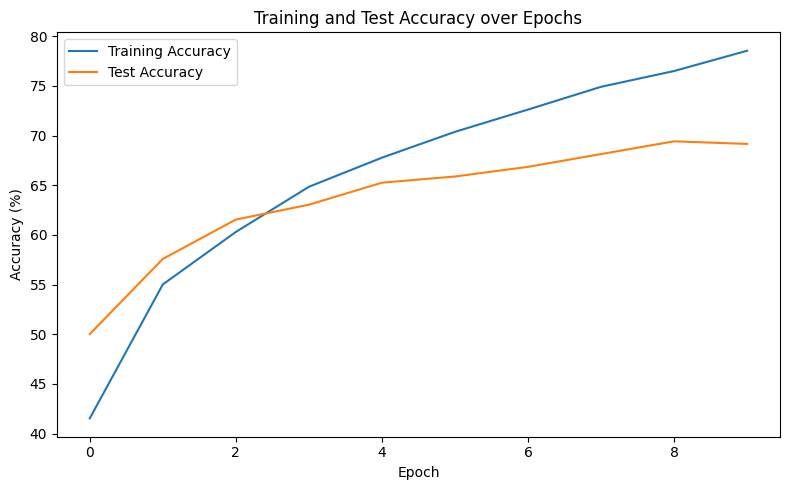

In [47]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy over Epochs')
plt.legend()
plt.tight_layout()
plt.show()